# INM 702 Coursework Code: Task 1
## Implementation of ReLu activation on forward and backward pass
### By: Jasveen Kaur and Nikhil Vallakati

Importing the necessary packages for matrix computation

In [14]:
import numpy as np
import matplotlib.pylab as plt

ReLu Activation Function definition and its derivative on a single element and array:


In [15]:
def relu(x):
    return np.maximum(0.0, x)

def relu_d_element(x):
    if x <= 0:
        return 0
    else:
        return 1
def relu_d_array(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

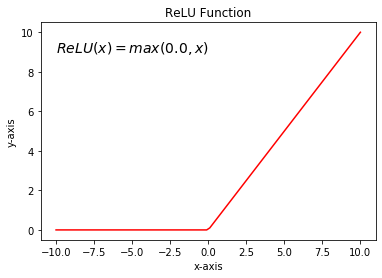

In [16]:
X = np.linspace(-10, 10, 100)
plt.plot(X, relu(X),'r')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('ReLU Function')
plt.text(-10, 9, r'$ReLU(x)=max(0.0, x)$', fontsize=14)
plt.show()

Sigmoid Activation function definition (to be used on the output of the network):

In [17]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

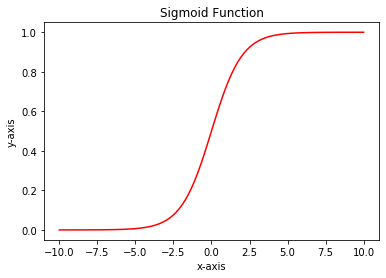

In [18]:
X = np.linspace(-10, 10, 100)
from matplotlib import pyplot as plt
plt.plot(X, sigmoid(X), c="r")
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Sigmoid Function')
plt.show()

Defining a sample input array (6x3) along with its label (6x1) to implement forward and backward pass:

In [19]:
input_set = np.array([[0,1,0],
                      [0,0,1],
                      [1,0,0],
                      [1,1,0],
                      [1,1,1],
                      [0,1,1],])#Dependent variable
labels = np.array([[1,
                    0,
                    0,
                    1,
                    1,
                    0,]])
labels = labels.reshape(6,1)

Forward and backward pass on the above defined array, with Relu activation on the hidden layer and Relu/Sigmoid on the output:

In [26]:
class neural_network(object):

    def __init__(self, n_hidden, epochs, lr, seed, out_act):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.epochs = epochs
        self.lr = lr
        self.seed = seed
        self.out_act = out_act
        
    #sigmoid activation function
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    #relu activation function
    def relu(self, x):
        return np.maximum(0, x) 
    
    #derivative of relu activation function(element)
    def relu_d_element(self, x):
        if x > 0:
            return 1
        elif x <= 0:
            return 0
    
    #derivative of relu activation function(array)
    def relu_d_array(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x

    #forward pass
    def forward_pass(self, X):
        
        z1 = np.dot(X, self.w1) + self.b1
        a1 = self.relu(z1)
        
        z_out = np.dot(a1, self.w_out) + self.b_out
        
        if self.out_act == 'sigmoid':
            a_out = self.sigmoid(z_out)
        else:
            a_out = self.relu(z_out)

        return z1, a1, z_out, a_out   

    #computing the loss
    def compute_cost(self, y_enc, a_out):
        term1 = a_out - y_enc 
        cost = term1.sum()
        return cost
    
    #predicting the output
    def predict_out(self, X):
        z1, a1,z_out, a_out = self.forward_pass(X)
        y_pred = np.argmax(a_out, axis=1)
        return y_pred
    
    #calculating the accuracy
    def accuracy(self, y, y_pred, X):
        return ((np.sum(y.T == y_pred)).astype(np.float) / X.shape[0])
    
    def train(self, X_train, y_train):

        n_output = np.unique(y_train).shape[0] 
        n_features = X_train.shape[1]

        #Initializing the weights
        
        #hidden layer
        self.b1 = np.zeros(self.n_hidden)
        self.w1 = self.random.normal(loc=0.0, scale=0.1,size=(n_features, self.n_hidden))
        
        #output layer
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, n_output))
        
        #training epochs
        for i in range(self.epochs):
            
            # forward propagation
            z1, a1, z_out, a_out = self.forward_pass(X_train)
            
            # Backpropagation
            sigma_out = a_out - labels 
            error = sigma_out
            relu_derivative = self.relu_d_array(a1)
            sigma_h1 = (np.dot(sigma_out, self.w_out.T) * relu_derivative)
                
            grad_w1 = np.dot(X_train.T, sigma_h1)
            grad_b1 = np.sum(sigma_h1, axis=0)

            grad_w_out = np.dot(a1.T, sigma_out)
            grad_b_out = np.sum(sigma_out, axis=0)

            delta_w1 = grad_w1
            delta_w_out = grad_w_out  
            
            delta_b1 = grad_b1
            delta_b_out = grad_b_out
                
            #updating the weights
            self.w1 -= self.lr * delta_w1
            self.w_out -= self.lr * delta_w_out

            self.b1 -= self.lr * delta_b1           
            self.b_out -= self.lr * delta_b_out

        
            #evaluating the trained model with updated weights
            z1, a1, z_out, a_out = self.forward_pass(X_train)
            
            cost = self.compute_cost(y_enc=labels, a_out=a_out)
            y_train_pred = self.predict_out(X_train)

            train_acc = self.accuracy(y_train, y_train_pred, X_train)
            #cost/loss = sigma_out.sum()
            print("epoch:", i+1)
            print("Accuracy:","{:.2f}".format(train_acc*100),"% ||","loss:","{:.3f}".format(cost))

        return self


Initializing the parameters and propagating through one layer network

In [13]:
Model = neural_network(n_hidden=7, epochs=600, lr=0.0005, seed=1, out_act = 'relu')
Model.train(X_train=input_set, 
       y_train=labels)

epoch: 1
Accuracy: 50.00 % || loss: -5.927
epoch: 2
Accuracy: 66.67 % || loss: -5.912
epoch: 3
Accuracy: 66.67 % || loss: -5.894
epoch: 4
Accuracy: 66.67 % || loss: -5.875
epoch: 5
Accuracy: 66.67 % || loss: -5.856
epoch: 6
Accuracy: 66.67 % || loss: -5.837
epoch: 7
Accuracy: 66.67 % || loss: -5.818
epoch: 8
Accuracy: 66.67 % || loss: -5.797
epoch: 9
Accuracy: 66.67 % || loss: -5.777
epoch: 10
Accuracy: 66.67 % || loss: -5.756
epoch: 11
Accuracy: 66.67 % || loss: -5.736
epoch: 12
Accuracy: 66.67 % || loss: -5.716
epoch: 13
Accuracy: 66.67 % || loss: -5.695
epoch: 14
Accuracy: 66.67 % || loss: -5.675
epoch: 15
Accuracy: 66.67 % || loss: -5.655
epoch: 16
Accuracy: 66.67 % || loss: -5.635
epoch: 17
Accuracy: 66.67 % || loss: -5.615
epoch: 18
Accuracy: 66.67 % || loss: -5.595
epoch: 19
Accuracy: 66.67 % || loss: -5.575
epoch: 20
Accuracy: 66.67 % || loss: -5.555
epoch: 21
Accuracy: 66.67 % || loss: -5.536
epoch: 22
Accuracy: 66.67 % || loss: -5.516
epoch: 23
Accuracy: 66.67 % || loss: -5.4

Accuracy: 66.67 % || loss: -2.870
epoch: 191
Accuracy: 66.67 % || loss: -2.856
epoch: 192
Accuracy: 66.67 % || loss: -2.842
epoch: 193
Accuracy: 66.67 % || loss: -2.828
epoch: 194
Accuracy: 66.67 % || loss: -2.814
epoch: 195
Accuracy: 66.67 % || loss: -2.800
epoch: 196
Accuracy: 66.67 % || loss: -2.786
epoch: 197
Accuracy: 66.67 % || loss: -2.773
epoch: 198
Accuracy: 66.67 % || loss: -2.759
epoch: 199
Accuracy: 66.67 % || loss: -2.745
epoch: 200
Accuracy: 66.67 % || loss: -2.732
epoch: 201
Accuracy: 66.67 % || loss: -2.718
epoch: 202
Accuracy: 66.67 % || loss: -2.704
epoch: 203
Accuracy: 66.67 % || loss: -2.691
epoch: 204
Accuracy: 66.67 % || loss: -2.677
epoch: 205
Accuracy: 66.67 % || loss: -2.664
epoch: 206
Accuracy: 66.67 % || loss: -2.650
epoch: 207
Accuracy: 66.67 % || loss: -2.637
epoch: 208
Accuracy: 66.67 % || loss: -2.623
epoch: 209
Accuracy: 66.67 % || loss: -2.610
epoch: 210
Accuracy: 66.67 % || loss: -2.597
epoch: 211
Accuracy: 66.67 % || loss: -2.583
epoch: 212
Accuracy: 

Accuracy: 66.67 % || loss: -0.027
epoch: 532
Accuracy: 66.67 % || loss: -0.023
epoch: 533
Accuracy: 66.67 % || loss: -0.020
epoch: 534
Accuracy: 66.67 % || loss: -0.017
epoch: 535
Accuracy: 66.67 % || loss: -0.014
epoch: 536
Accuracy: 66.67 % || loss: -0.011
epoch: 537
Accuracy: 66.67 % || loss: -0.008
epoch: 538
Accuracy: 66.67 % || loss: -0.005
epoch: 539
Accuracy: 66.67 % || loss: -0.003
epoch: 540
Accuracy: 66.67 % || loss: 0.000
epoch: 541
Accuracy: 66.67 % || loss: 0.003
epoch: 542
Accuracy: 66.67 % || loss: 0.006
epoch: 543
Accuracy: 66.67 % || loss: 0.009
epoch: 544
Accuracy: 66.67 % || loss: 0.011
epoch: 545
Accuracy: 66.67 % || loss: 0.013
epoch: 546
Accuracy: 66.67 % || loss: 0.015
epoch: 547
Accuracy: 66.67 % || loss: 0.017
epoch: 548
Accuracy: 66.67 % || loss: 0.019
epoch: 549
Accuracy: 66.67 % || loss: 0.021
epoch: 550
Accuracy: 66.67 % || loss: 0.023
epoch: 551
Accuracy: 66.67 % || loss: 0.026
epoch: 552
Accuracy: 66.67 % || loss: 0.028
epoch: 553
Accuracy: 66.67 % || lo

Using Relu on hidden and output layer gave less accuracy in the first few epochs but was soon comparable enough to the accuracy of using Relu on hidden and sigmoid on output layer. The final accuracy after 600 epochs is 83.33%